## Feature Engineering

The dataset is obtained from the Seventeenth release of Sloan Digital Sky Surveys (SDSS - DR17). The dataset consists of 100,000 data points with 18 attributes including the class of astronomical objects.

In [1]:
import pandas as pd # For Dataframe manupulation
import numpy as np # For arrays manipulation

#### Data Cleansing

In [2]:
df = pd.read_csv("Datasets/sgq_classification.csv") # Importing astronomical objects dataset
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [3]:
# Handling missing values

null_counts = df.isnull().sum() # To Count the null values in each column

print(null_counts) # to print the null counts for each column

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


There are no null values in the dataset.

In [4]:
# Handling duplicate values

# To Count the duplicate rows in the DataFrame
duplicate_count = df.duplicated().sum()

duplicate_count

0

There are no duplicate rows in the dataset

Outliers were not removed from the dataset , because there could be data with a wide range of spectral features due to the difference of each astronomical object. Otherwise there could be loss of important information, Biasing of the model and Overfitting.

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


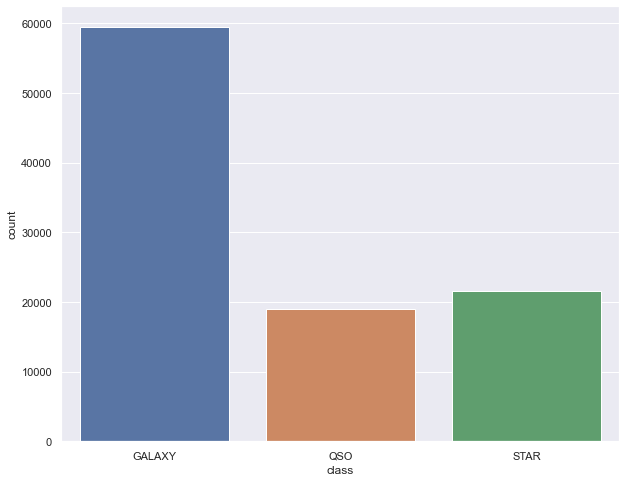

In [5]:
# visualizing distribution of each class

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')
fig = plt.gcf()
fig.set_size_inches(10,8)
sns.countplot(df['class'])
plt.show()

In [6]:
# to obtaing number of objects from each class
value_counts = df['class'].value_counts()

print(value_counts)

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64


According to the above analysis, it shows that there is an imbalance in the dataset considering the class feature.As a solution the dataset is undersampled with the RandomUnderSampler function.

#### Data Undersampling

In [7]:

import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

# separating the features and target variable
x = df.drop('class', axis=1)
y = df['class']

# applying RandomUnderSampler to undersample the majority class
rus = RandomUnderSampler()
x_resampled, y_resampled = rus.fit_resample(x, y)

# creating a new DataFrame with the undersampled dataset
dfr = pd.concat([x_resampled, y_resampled], axis=1)

# replacing the original dataset with the undersampled dataset
df = dfr

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


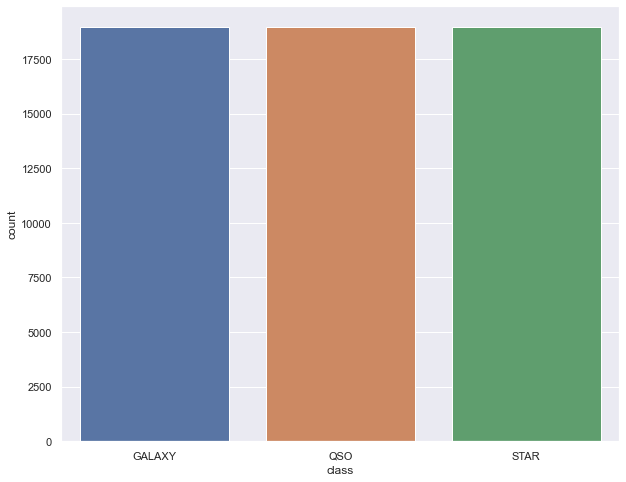

In [8]:
# checking the status of the dataset after undersampling

# visualizing distribution of each class after undersampling

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')
fig = plt.gcf()
fig.set_size_inches(10,8)
sns.countplot(dfr['class'])
plt.show()

In [9]:
# obtaing number of objects from each class after undersampling
value_counts = dfr['class'].value_counts()

print(value_counts)

GALAXY    18961
QSO       18961
STAR      18961
Name: class, dtype: int64


#### Feature Selection

In [10]:
# To select a subset of columns
columns_to_keep = ['alpha', 'delta', 'u','g','r','i','z','redshift','class']
dfr = dfr[columns_to_keep]

dfr

,alpha,delta,u,g,r,i,z,redshift,class
0,127.795320,24.958892,21.74193,21.01601,20.64891,20.48670,20.29914,0.085165,GALAXY
1,236.273439,2.278374,23.43565,21.61091,19.57008,18.81848,18.37688,0.424406,GALAXY
2,125.509031,10.969748,20.53257,18.77769,17.80122,17.34038,16.96512,0.113041,GALAXY
3,204.959025,18.714723,18.71199,16.88510,15.88820,15.46938,15.12257,0.115002,GALAXY
4,347.125427,21.841755,24.14483,23.93322,22.38630,21.12453,20.07505,0.690615,GALAXY
...,...,...,...,...,...,...,...,...,...
56878,2.779962,-7.468473,21.53840,20.01989,19.46572,19.20615,19.08971,-0.000411,STAR
56879,322.391824,12.275236,19.94351,18.82273,18.39752,18.24566,18.10555,-0.000399,STAR
56880,134.527002,11.149643,19.40473,19.17503,19.47011,19.70635,19.83959,0.000167,STAR
56881,221.094012,-2.435753,18.77790,17.71017,17.23693,17.03404,16.95549,-0.000433,STAR


#### Feature Transformation

In [11]:
from sklearn.preprocessing import LabelEncoder

# To create a LabelEncoder object
le = LabelEncoder()

# To encode categorical variables
dfr['class'] = le.fit_transform(df['class'])
dfr

C:\Users\Asus\AppData\Local\Temp\ipykernel_13648\1752500157.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr['class'] = le.fit_transform(df['class'])


,alpha,delta,u,g,r,i,z,redshift,class
0,127.795320,24.958892,21.74193,21.01601,20.64891,20.48670,20.29914,0.085165,0
1,236.273439,2.278374,23.43565,21.61091,19.57008,18.81848,18.37688,0.424406,0
2,125.509031,10.969748,20.53257,18.77769,17.80122,17.34038,16.96512,0.113041,0
3,204.959025,18.714723,18.71199,16.88510,15.88820,15.46938,15.12257,0.115002,0
4,347.125427,21.841755,24.14483,23.93322,22.38630,21.12453,20.07505,0.690615,0
...,...,...,...,...,...,...,...,...,...
56878,2.779962,-7.468473,21.53840,20.01989,19.46572,19.20615,19.08971,-0.000411,2
56879,322.391824,12.275236,19.94351,18.82273,18.39752,18.24566,18.10555,-0.000399,2
56880,134.527002,11.149643,19.40473,19.17503,19.47011,19.70635,19.83959,0.000167,2
56881,221.094012,-2.435753,18.77790,17.71017,17.23693,17.03404,16.95549,-0.000433,2


In [12]:
print(le.classes_)

['GALAXY' 'QSO' 'STAR']


### Feature Scaling

##### Normalization using min-max method

In [13]:
# Copying df dataset for min_max normalization
dfn = dfr.copy()

In [14]:
# Selecting the columns to be normalized
cols_to_normalize = ['alpha', 'delta', 'u','g','r','i','z','redshift']

# Calculating the minimum and maximum values of each column
min_vals = dfn[cols_to_normalize].min()
max_vals = dfn[cols_to_normalize].max()

# Normalizing each column using the min-max method
dfn[cols_to_normalize] = (dfn[cols_to_normalize] - min_vals) / (max_vals - min_vals)

In [15]:
dfn

,alpha,delta,u,g,r,i,z,redshift,class
0,0.354968,0.429767,0.998900,0.999213,0.609233,0.485930,0.999153,0.012729,0
1,0.656305,0.206941,0.999068,0.999273,0.548527,0.412348,0.998962,0.061086,0
2,0.348617,0.292330,0.998779,0.998990,0.448992,0.347152,0.998821,0.016703,0
3,0.569318,0.368421,0.998598,0.998802,0.341345,0.264626,0.998637,0.016982,0
4,0.964237,0.399143,0.999139,0.999504,0.706998,0.514064,0.999131,0.099033,0
...,...,...,...,...,...,...,...,...,...
56878,0.007692,0.111183,0.998879,0.999114,0.542655,0.429447,0.999033,0.000531,2
56879,0.895530,0.305156,0.998720,0.998995,0.482546,0.387082,0.998934,0.000533,2
56880,0.373667,0.294098,0.998667,0.999030,0.542902,0.451510,0.999107,0.000613,2
56881,0.614139,0.160627,0.998604,0.998884,0.417239,0.333640,0.998820,0.000528,2


In [16]:
# Save the min-max normalized dataset with redshift to a new CSV file
dfn.to_csv("Datasets/sgq_classification_mm_r.csv",index = False)

In [17]:
dfn_wr =dfn.drop(['redshift'],axis='columns') # to create a dataset without redshift

In [18]:
# Save the min-max normalized dataset without redshift to a new CSV file
dfn_wr.to_csv("Datasets/sgq_classification_mm_wr.csv",index = False)

##### Normalization using Z-Score method

In [19]:
# Copying df dataset for Z-Score normalization
dfz = dfr.copy()

In [20]:
# Select the columns to be normalized
cols_to_normalize = ['alpha', 'delta', 'u','g','r','i','z','redshift']

# Calculating the mean and standard deviation of each column
mean_vals = dfz[cols_to_normalize].mean()
std_vals = dfz[cols_to_normalize].std()

# Normalizing each column using the z-score method
dfz[cols_to_normalize] = (dfz[cols_to_normalize] - mean_vals) / std_vals


In [21]:
dfz

,alpha,delta,u,g,r,i,z,redshift,class
0,-0.508038,0.012944,0.003698,0.016904,0.508349,0.681248,0.034714,-0.686857,0
1,0.601674,-1.131188,0.043957,0.031049,-0.081230,-0.256622,-0.011008,-0.316196,0
2,-0.531426,-0.692747,-0.025047,-0.036319,-1.047909,-1.087607,-0.044587,-0.656399,0
3,0.281333,-0.302047,-0.068321,-0.081321,-2.093371,-2.139479,-0.088413,-0.654256,0
4,1.735670,-0.144302,0.060813,0.086270,1.457829,1.039835,0.029384,-0.025330,0
...,...,...,...,...,...,...,...,...,...
56878,-1.786922,-1.622874,-0.001139,-0.006782,-0.138263,-0.038675,0.005947,-0.780359,2
56879,1.482649,-0.626891,-0.039049,-0.035248,-0.722032,-0.578660,-0.017462,-0.780346,2
56880,-0.439174,-0.683672,-0.051855,-0.026871,-0.135864,0.242537,0.023783,-0.779727,2
56881,0.446391,-1.368995,-0.066754,-0.061703,-1.356292,-1.259831,-0.044817,-0.780383,2


In [22]:
# Saving the z-score normalized dataset with redshift to a new CSV file
dfz.to_csv("Datasets/sgq_classification_zc_r.csv",index = False)

In [23]:
dfz_wr =dfz.drop(['redshift'],axis='columns')  # to create a dataset without redshift

In [24]:
# Saving the z-score normalized dataset without redshift to a new CSV file
dfz_wr.to_csv("Datasets/sgq_classification_zc_wr.csv",index = False)